# Evaluate Classifiers

In [26]:
# Packages
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Class Labels

In [27]:
class_labels = pd.read_excel('../../Data/Relabeled_Test_No_Blur/relabeled_test_no_blur_old_and_new_labels.xlsx')
class_labels

,filename,label,New Class,Old Class
0,Convertible_test_orig_test_00023_resized_no_bl...,2,Convertible,Convertible
1,Convertible_test_orig_test_00096_resized_no_bl...,2,Convertible,Convertible
2,Convertible_test_orig_test_00107_resized_no_bl...,2,Convertible,Convertible
3,Convertible_test_orig_test_00135_resized_no_bl...,2,Convertible,Convertible
4,Convertible_test_orig_test_00147_resized_no_bl...,2,Convertible,Convertible
...,...,...,...,...
1651,Sedan_test_orig_train_08026_resized_no_blur.jpg,5,Ambiguous,Sedan
1652,Sedan_test_orig_train_08043_resized_no_blur.jpg,3,Sedan,Sedan
1653,Sedan_test_orig_train_08046_resized_no_blur.jpg,3,Sedan,Sedan
1654,Sedan_test_orig_train_08098_resized_no_blur.jpg,3,Sedan,Sedan


## Evaluation Function

Input predicted and true labels and a classifier name, output a table of the accuracy, precision, recall, f1 score, and a plot of the confusion matrix.

In [28]:
def evaluate_classifier(y_true, y_pred, classifier_name):

    # Convert labels to integers
    label_mapping = {
        'SUV': 0,
        'Sedan': 1,
        'Pickup': 2,
        'Convertible': 3
    }
    y_true_num = np.array([label_mapping[label] for label in y_true])
    y_pred_num = np.array([label_mapping[label] for label in y_pred])

    # Print the classification report
    print(f"Classification Report for {classifier_name}:")
    print(classification_report(y_true_num, y_pred_num, target_names=label_mapping.keys()))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    # Confusion Matrix Display
    cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_mapping.keys())

    # Plot Confusion Matrix
    plt.figure(figsize=(10, 8))
    cm_display.plot(cmap='Blues', ax=plt.gca(), xticks_rotation='vertical')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()


## GPT-4 Vision

In [29]:
# Load data '../../Data/Predictions/GPT-4 Vision/GPT-4_Vision_Relabeled_Test_No_Blur_predictions.xlsx'
GPT_4_Vision_Relabeled_Test_No_Blur_predictions = pd.read_excel('../../Data/Predictions/GPT-4 Vision/GPT-4_Vision_Relabeled_Test_No_Blur_predictions.xlsx')
GPT_4_Vision_Relabeled_Test_No_Blur_predictions

,filename,label,New Class,Old Class,non_blurred_image_path,gpt_4_v_classification
0,Convertible_test_orig_test_00023_resized_no_bl...,2,Convertible,Convertible,../../../Images/test/No Blur/Convertible_test_...,Convertible
1,Convertible_test_orig_test_00096_resized_no_bl...,2,Convertible,Convertible,../../../Images/test/No Blur/Convertible_test_...,Convertible
2,Convertible_test_orig_test_00107_resized_no_bl...,2,Convertible,Convertible,../../../Images/test/No Blur/Convertible_test_...,Sedan
3,Convertible_test_orig_test_00135_resized_no_bl...,2,Convertible,Convertible,../../../Images/test/No Blur/Convertible_test_...,Convertible
4,Convertible_test_orig_test_00147_resized_no_bl...,2,Convertible,Convertible,../../../Images/test/No Blur/Convertible_test_...,Convertible
...,...,...,...,...,...,...
1484,Convertible_test_orig_test_04996_resized_no_bl...,2,Convertible,Convertible,../../../Images/test/No Blur/Convertible_test_...,Convertible
1485,Convertible_test_orig_test_07402_resized_no_bl...,2,Convertible,Convertible,../../../Images/test/No Blur/Convertible_test_...,Convertible
1486,Convertible_test_orig_train_00357_resized_no_b...,2,Convertible,Convertible,../../../Images/test/No Blur/Convertible_test_...,Convertible
1487,Convertible_test_orig_train_01077_resized_no_b...,2,Convertible,Convertible,../../../Images/test/No Blur/Convertible_test_...,Convertible


Classification Report for GPT-4 Vision:
              precision    recall  f1-score   support

         SUV       0.93      1.00      0.96       441
       Sedan       0.96      0.98      0.97       580
      Pickup       0.99      0.87      0.92       189
 Convertible       0.99      0.92      0.95       279

    accuracy                           0.96      1489
   macro avg       0.97      0.94      0.95      1489
weighted avg       0.96      0.96      0.96      1489



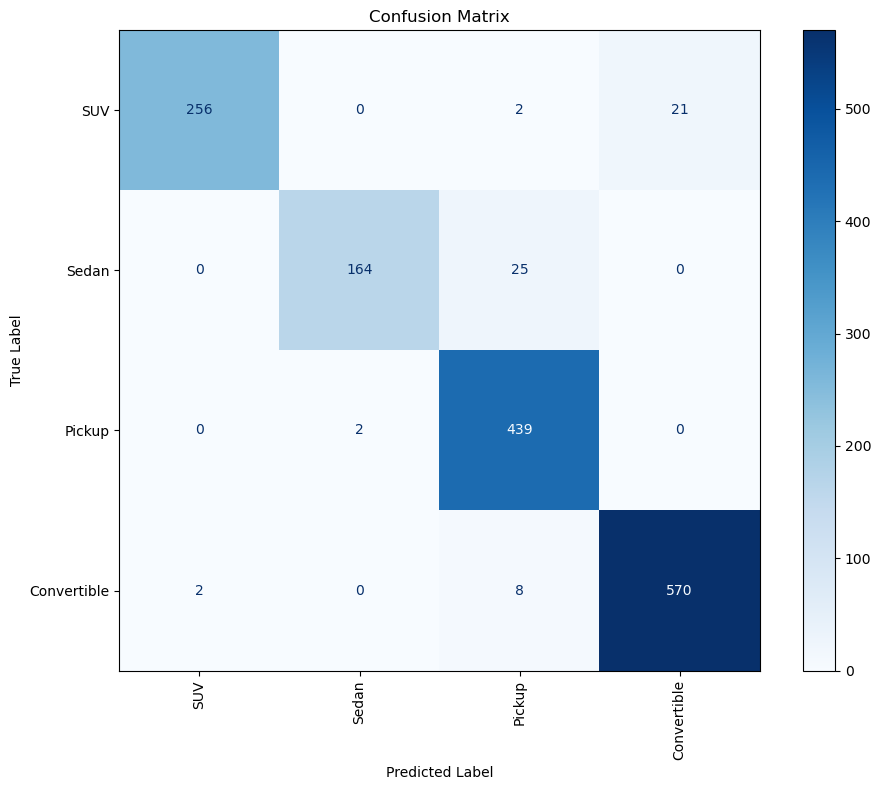

In [30]:
# Evaluate on 'New Class' and 'gpt_4_v_classification'
evaluate_classifier(GPT_4_Vision_Relabeled_Test_No_Blur_predictions['New Class'], GPT_4_Vision_Relabeled_Test_No_Blur_predictions['gpt_4_v_classification'], 'GPT-4 Vision')

## Logistic Regression

In [31]:
# Load '../../Data/Predictions/Logistic Regression/Logistic_Regression_Classifier_Predictions.xlsx'
Logistic_Regression_Classifier_Predictions = pd.read_excel('../../Data/Predictions/Logistic Regression/Logistic_Regression_Classifier_Predictions.xlsx')
# Create filename variable by splitting Image Path on '/' and taking the last element
Logistic_Regression_Classifier_Predictions['filename'] = Logistic_Regression_Classifier_Predictions['Image Path'].apply(lambda x: x.split('/')[-1])
Logistic_Regression_Classifier_Predictions

,Image Path,Logistic_Regression_Classification,filename
0,../../../Images/test/No Blur/Pickup_test_orig_...,SUV,Pickup_test_orig_test_05620_resized_no_blur.jpg
1,../../../Images/test/No Blur/SUV_test_orig_tes...,Sedan,SUV_test_orig_test_08041_resized_no_blur.jpg
2,../../../Images/test/No Blur/Convertible_test_...,Convertible,Convertible_test_orig_test_00822_resized_no_bl...
3,../../../Images/test/No Blur/Convertible_test_...,Convertible,Convertible_test_orig_test_00618_resized_no_bl...
4,../../../Images/test/No Blur/Sedan_test_orig_t...,Convertible,Sedan_test_orig_test_02727_resized_no_blur.jpg
...,...,...,...
1651,../../../Images/test/No Blur/SUV_test_orig_tes...,SUV,SUV_test_orig_test_06465_resized_no_blur.jpg
1652,../../../Images/test/No Blur/Convertible_test_...,Convertible,Convertible_test_orig_test_04413_resized_no_bl...
1653,../../../Images/test/No Blur/Sedan_test_orig_t...,Sedan,Sedan_test_orig_train_06492_resized_no_blur.jpg
1654,../../../Images/test/No Blur/SUV_test_orig_tra...,Pickup,SUV_test_orig_train_07271_resized_no_blur.jpg


In [32]:
# Inner join dota
Logistic_Regression_Classifier_Predictions = Logistic_Regression_Classifier_Predictions.merge(class_labels, on='filename', how='inner')
print(Logistic_Regression_Classifier_Predictions['New Class'].value_counts())
# Keep only if New Class in ['SUV', 'Sedan', 'Pickup', 'Convertible']
Logistic_Regression_Classifier_Predictions = Logistic_Regression_Classifier_Predictions[Logistic_Regression_Classifier_Predictions['New Class'].isin(['SUV', 'Sedan', 'Pickup', 'Convertible'])]
Logistic_Regression_Classifier_Predictions

New Class
Sedan                    580
SUV                      441
Convertible              279
Pickup                   189
Ambiguous                161
Clearly None of the 4      6
Name: count, dtype: int64


,Image Path,Logistic_Regression_Classification,filename,label,New Class,Old Class
0,../../../Images/test/No Blur/Pickup_test_orig_...,SUV,Pickup_test_orig_test_05620_resized_no_blur.jpg,1,Pickup,Pickup
1,../../../Images/test/No Blur/SUV_test_orig_tes...,Sedan,SUV_test_orig_test_08041_resized_no_blur.jpg,0,SUV,SUV
2,../../../Images/test/No Blur/Convertible_test_...,Convertible,Convertible_test_orig_test_00822_resized_no_bl...,2,Convertible,Convertible
3,../../../Images/test/No Blur/Convertible_test_...,Convertible,Convertible_test_orig_test_00618_resized_no_bl...,2,Convertible,Convertible
6,../../../Images/test/No Blur/Pickup_test_orig_...,Pickup,Pickup_test_orig_test_05241_resized_no_blur.jpg,1,Pickup,Pickup
...,...,...,...,...,...,...
1651,../../../Images/test/No Blur/SUV_test_orig_tes...,SUV,SUV_test_orig_test_06465_resized_no_blur.jpg,0,SUV,SUV
1652,../../../Images/test/No Blur/Convertible_test_...,Convertible,Convertible_test_orig_test_04413_resized_no_bl...,2,Convertible,Convertible
1653,../../../Images/test/No Blur/Sedan_test_orig_t...,Sedan,Sedan_test_orig_train_06492_resized_no_blur.jpg,3,Sedan,Sedan
1654,../../../Images/test/No Blur/SUV_test_orig_tra...,Pickup,SUV_test_orig_train_07271_resized_no_blur.jpg,1,Pickup,SUV


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         SUV       0.79      0.77      0.78       441
       Sedan       0.79      0.90      0.84       580
      Pickup       0.86      0.59      0.70       189
 Convertible       0.79      0.77      0.78       279

    accuracy                           0.80      1489
   macro avg       0.81      0.76      0.78      1489
weighted avg       0.80      0.80      0.79      1489



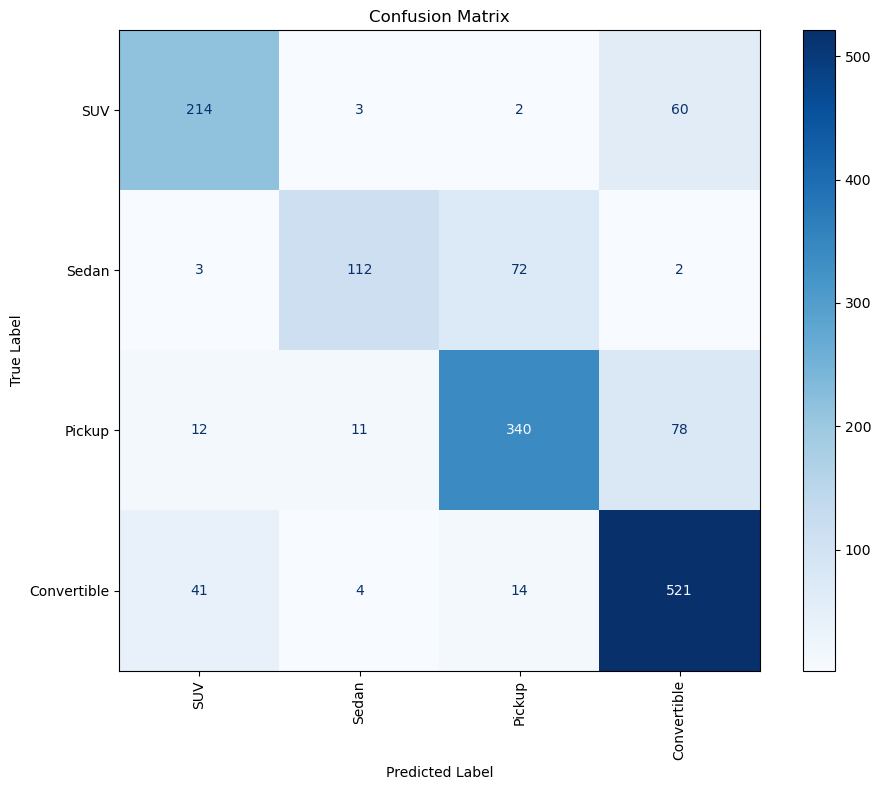

In [33]:
# Evaluate on 'New Class' and 'Logistic_Regression_Classification'
evaluate_classifier(Logistic_Regression_Classifier_Predictions['New Class'], Logistic_Regression_Classifier_Predictions['Logistic_Regression_Classification'], 'Logistic Regression')